In [2]:
#!/usr/bin/env python
import os, glob
from nilearn import image
from nilearn import plotting
import numpy as np
import pandas as pd
from pathlib import Path

In [8]:
output = pd.DataFrame()
current_dir = os.getcwd()
main_dir = '/Volumes/spacetop_projects_cue'
nilearn_dir = os.path.join(main_dir, 'analysis', 'fmri', 'nilearn')
singletrial_dir = os.path.join(nilearn_dir, 'singletrial')
sub = 'sub-0061'
print(sub)
sub_num = 61
ses_num = 1
run_num = 6
runtype = 'pain'
trial_num = 1

sub-0061


In [11]:
cue = glob.glob(os.path.join(singletrial_dir, sub,
                f'sub-{sub_num:04d}_ses-{ses_num:02d}_run-{run_num:02d}_runtype-{runtype}_event-cue_trial-{trial_num:03d}*.nii.gz'))[0]
stim = glob.glob(os.path.join(singletrial_dir, sub,
                f'sub-{sub_num:04d}_ses-{ses_num:02d}_run-{run_num:02d}_runtype-{runtype}_event-stimulus_trial-{trial_num:03d}*.nii.gz'))[0]
                        

In [12]:
cue_img = image.load_img(cue)
stim_img = image.load_img(stim)

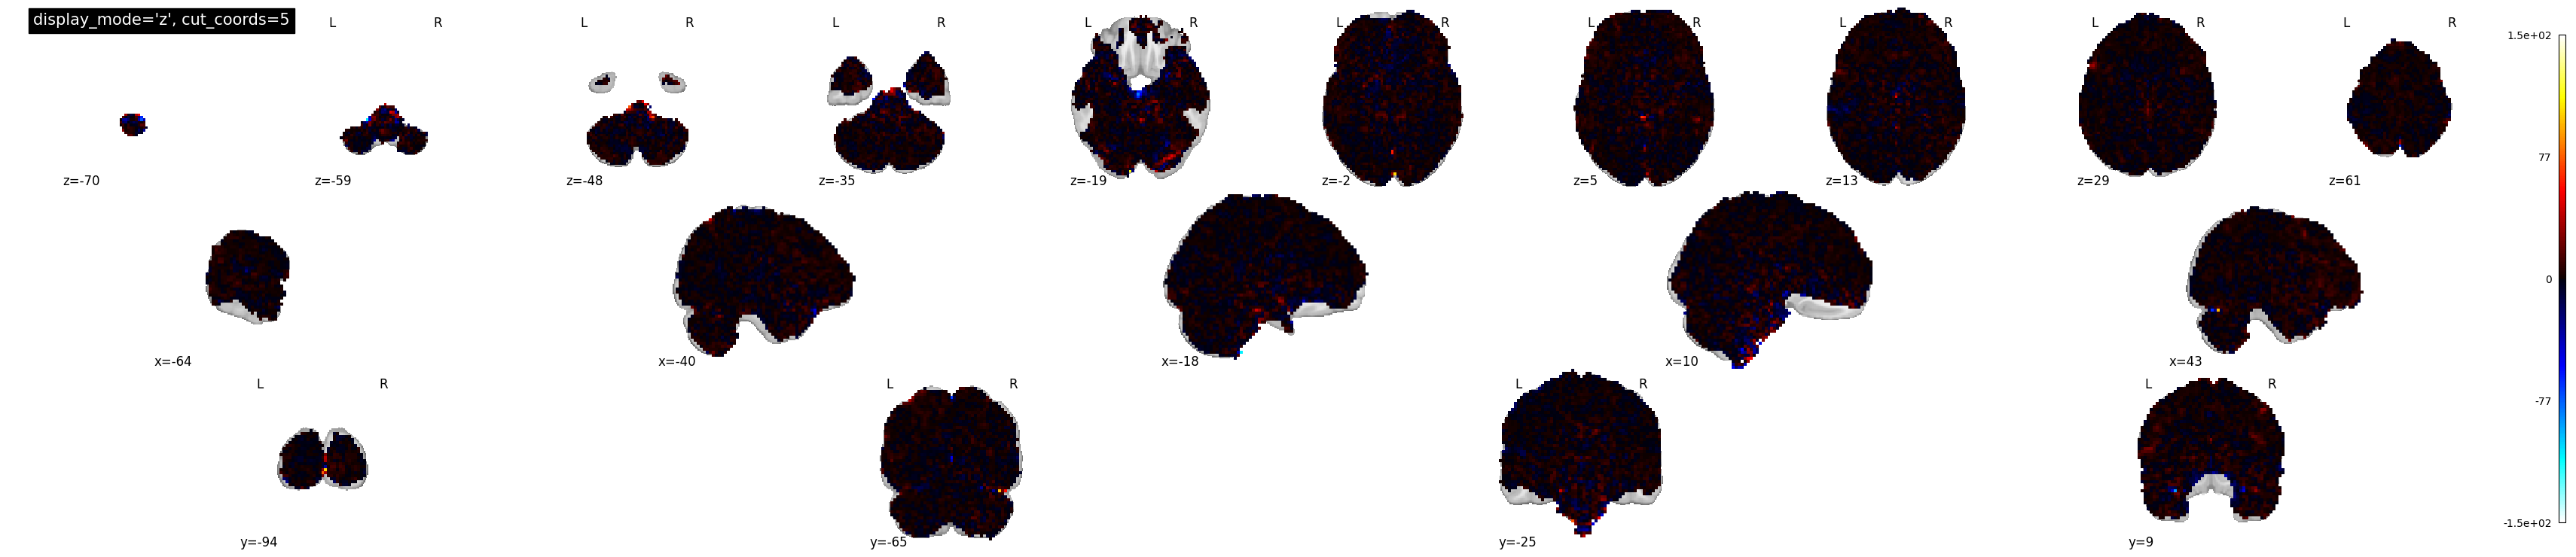

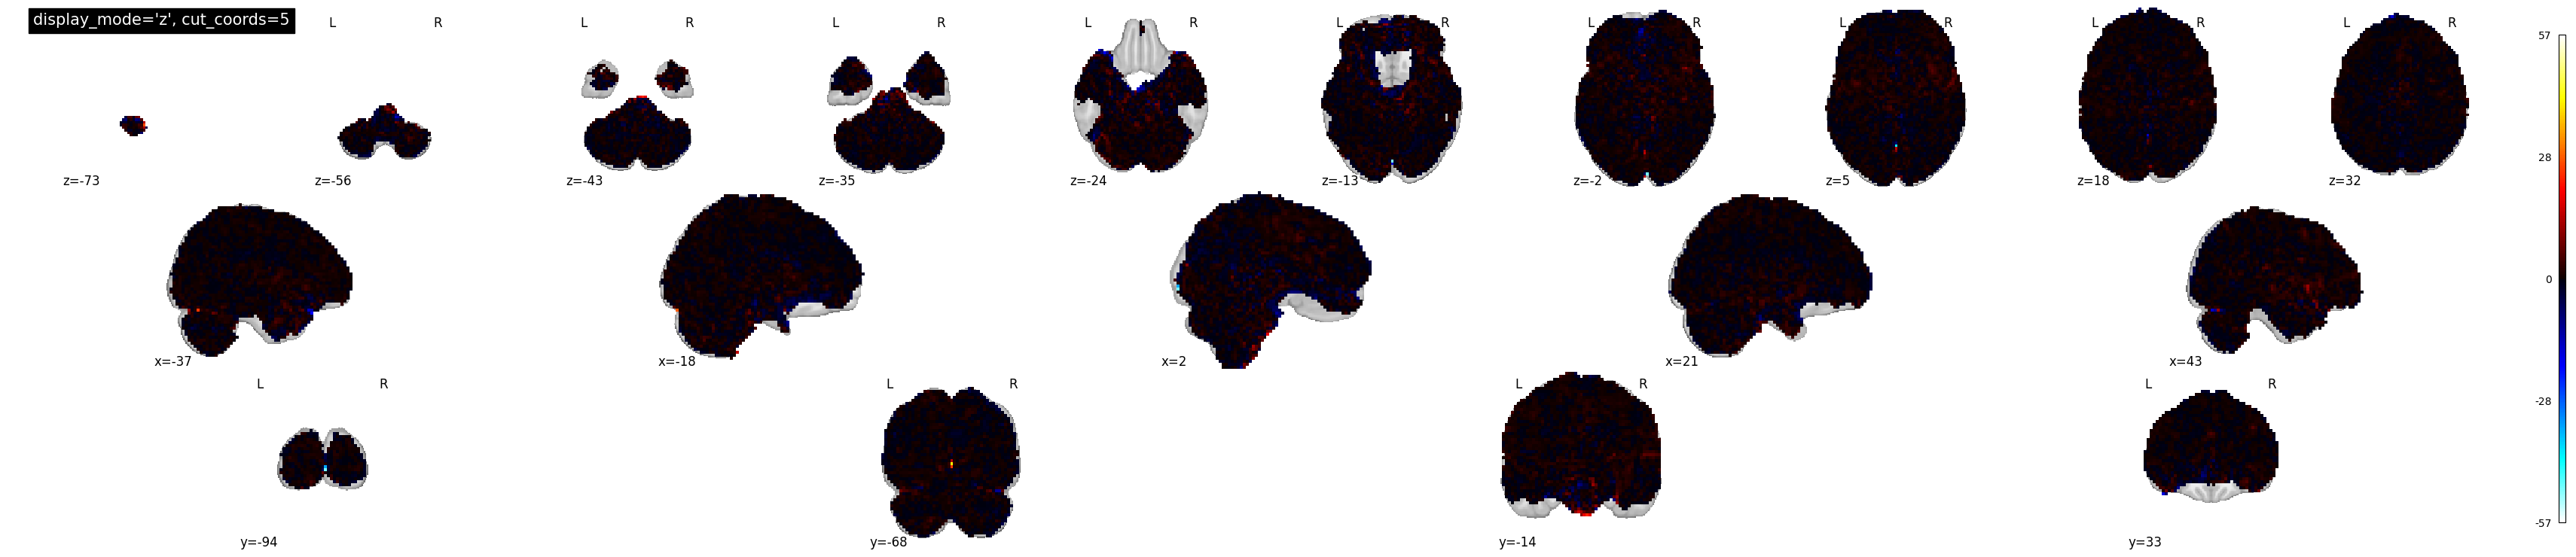

In [14]:

plotting.plot_stat_map(cue_img,display_mode='mosaic',
                       cut_coords=(5, 4, 10),
                       title="display_mode='z', cut_coords=5")
                       
plotting.plot_stat_map(stim_img,display_mode='mosaic',
                       cut_coords=(5, 4, 10),
                       title="display_mode='z', cut_coords=5")

In [19]:
dotprod = np.dot(cue_img.get_fdata().ravel().T, stim_img.get_fdata().ravel())
corr = np.corrcoef(cue_img.get_fdata().ravel().T, stim_img.get_fdata().ravel())[0][1]
corr

0.2385248991270316

In [9]:
# %% apply nps
nps_array = image.get_data(resampled_nps)
singletrial_array = image.get_data(stacked_singletrial)
len_singletrialstack = singletrial_array.shape[-1]
vectorize_singletrial = singletrial_array.reshape(np.prod(list(singletrial_array.shape[0:3])),len_singletrialstack )
nps_extract = np.dot(nps_array.reshape(-1), vectorize_singletrial)
nps_df = pd.DataFrame({'singletrial_fname': [os.path.basename(basename) for basename in img_flist], 'nps': nps_extract})
nps_df.head()

,singletrial_fname,nps
0,sub-0030_ses-01_run-03_runtype-pain_event-stim...,14.279780
1,sub-0030_ses-01_run-03_runtype-pain_event-stim...,2.128011
2,sub-0030_ses-01_run-03_runtype-pain_event-stim...,5.970292
3,sub-0030_ses-01_run-03_runtype-pain_event-stim...,2.582800
4,sub-0030_ses-01_run-03_runtype-pain_event-stim...,4.071396
